In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
pd.DataFrame(df)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [5]:
df.drop('Address', axis = 1, inplace=True)

In [6]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


<Axes: >

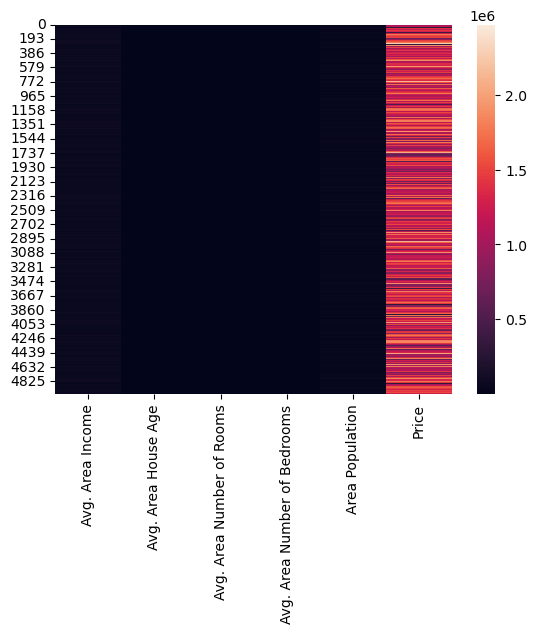

In [7]:
sns.heatmap(df)

In [29]:
feature_pipeline = Pipeline(steps=[
    ('scaling', StandardScaler())
])

In [11]:
feature_column =  ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
                   'Avg. Area Number of Bedrooms','Area Population']

In [9]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


In [30]:
feature_columns_pipeline = ColumnTransformer(transformers=[
    ('preprocessing',feature_pipeline,feature_column)
], verbose=True, remainder=('passthrough'),force_int_remainder_cols=False)

In [24]:
model = XGBRegressor()

In [31]:
final_pipeline = Pipeline(steps=[
    ('preprocessing',feature_columns_pipeline),
    ('model', XGBRegressor())
])

In [34]:
param_grid = {
   'model__n_estimators': [100,200,500],
    'model__learning_rate': [0.01,0.05,0.1,0.3],
    'model__max_depth': [3,5,7,10]
}

In [37]:
grid = GridSearchCV(final_pipeline,
                   param_grid = param_grid,
                   cv=5,
                   scoring='neg_root_mean_squared_error')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Price', axis=1),df['Price'], test_size=0.3, random_state=101)

In [19]:
y_train.head()

2654    1.723730e+06
2468    1.039381e+06
290     1.648247e+06
1463    8.245409e+05
4508    9.282108e+05
Name: Price, dtype: float64

In [41]:
xgboost_model = grid.fit(x_train, y_train)

[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[ColumnTransformer] . (1 of 1) Processing preprocessing, total=   0.0s
[Colum

In [40]:
grid.predict(x_test)

array([1285025.1,  780061.8, 1716557. , ..., 1479111.6,  658474.9,
       1366147.6], dtype=float32)

In [51]:
fit_model = xgboost_model.best_estimator_

In [54]:
columns = fit_model.named_steps['preprocessing']

In [47]:
importance = xgboost_model.best_estimator_.named_steps['model'].feature_importances_

In [55]:
def get_feature_names_from_column_transformer(ct):
    feature_names = []
    for name, trans, cols in ct.transformers_:
        if trans == 'drop':
            continue
        if name == 'remainder' and trans == 'passthrough':
            feature_names.extend(cols)
        elif hasattr(trans, 'get_feature_names_out'):
            feature_names.extend(trans.get_feature_names_out(cols))
        else:
            feature_names.extend(cols)
    return feature_names



In [58]:
preprocessor = fit_model.named_steps['preprocessing']
feature_names = get_feature_names_from_column_transformer(preprocessor)

In [59]:
preprocessor

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('preprocessing',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['Avg. Area Income', 'Avg. Area House Age',
                                  'Avg. Area Number of Rooms',
                                  'Avg. Area Number of Bedrooms',
                                  'Area Population'])],
                  verbose=True)

In [60]:
feature_names

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [63]:
data =pd.DataFrame({
    'feature_names': feature_names,
    'importances': importance
})

<Axes: xlabel='feature_names', ylabel='importances'>

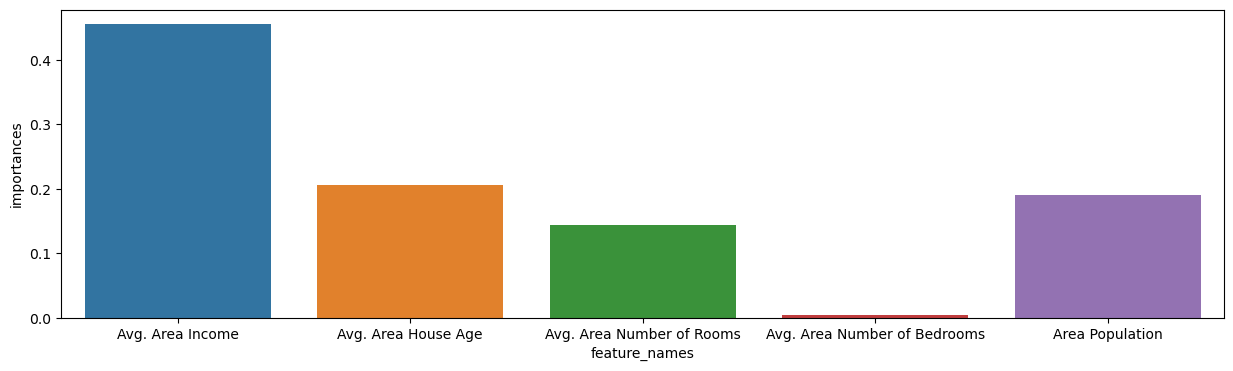

In [74]:
plt.figure(figsize=(15,4))
sns.barplot(x='feature_names',y='importances', data= data)


In [75]:
fit_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('preprocessing',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Avg. Area Income',
                                                   'Avg. Area House Age',
                                                   'Avg. Area Number of Rooms',
                                                   'Avg. Area Number of '
                                                   'Bedrooms',
                                                   'Area Population'])],
                                   verbose=True)),
                ('model',
                 XGBRegressor(base_score=None, boo...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])